In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import seaborn as sns

In [ ]:
# question 1: how influential are age and gender for registraton rates?
# question 2: how does age and gender reflect in play rates across users?

''' load activity and profile dataframes with parameters '''

In [5]:
activity_data = pd.read_table('usersha1-artmbid-artname-plays.tsv', header = None, 
                names = ['users', 'musicbrainz-artist-id', 'artist-name', 'plays'],
                usecols = ['users', 'artist-name', 'plays'])

In [6]:
profile_data = pd.read_table('usersha1-profile.tsv', header = None, parse_dates=['signup'], index_col=['signup'],
                names = ['users', 'gender', 'age', 'country', 'signup'],
                usecols = ['users', 'gender', 'age', 'country', 'signup'])

''' sort time index of profile df '''

In [7]:
profile_data.sort_index(inplace=True)

''' fill missing age values with mean average '''

In [8]:
profile_data['age'] = profile_data['age'].fillna(round(profile_data['age'].mean()))

''' backfill missing gender values '''

In [9]:
profile_data['gender'].fillna(method='bfill', inplace=True)

''' filter US and Canada users '''

In [10]:
usa_profiles = profile_data.loc[profile_data['country'].isin(['United States', 'Canada'])]

''' remove age outlier data '''

In [11]:
usa_profiles = usa_profiles.query('15 < age < 75')

''' merge dataframes on users column '''

In [12]:
full_df = full_df = pd.merge(activity_data, usa_profiles, on='users')

''' rename columns of merged dataframe '''

In [13]:
full_df.columns = ['users', 'artist', 'plays', 'gender', 'age', 'country']

''' filter user and artist '''

In [14]:
user_artist = full_df[['users','artist']]

In [15]:
user_artist['users'].nunique()

74617

In [16]:
user_artist['artist'].nunique()

121344

''' nested of dictionary of user:artists '''

In [17]:
user_artist_dict = user_artist.groupby('users').artist.apply(list).to_dict()

In [18]:
type(user_artist_dict)

dict

In [19]:
len(user_artist_dict)

74617

''' nested of dictionary of artist:users '''

In [20]:
artist_user_dict = user_artist.groupby('artist').users.apply(list).to_dict()

In [21]:
type(artist_user_dict)

dict

In [22]:
len(artist_user_dict)

121344

In [23]:
len(artist_user_dict)

121344

In [24]:
full_df['artist'].nunique()

121344

In [25]:
usa_profiles.head()

,users,gender,age,country
signup,,,,
2002-10-29,45ee3cbbec1d2b42192961bc0f7e216cb8d89bce,m,31.0,United States
2002-10-29,c4a0433a23c527320cb043dfc9e059a59582aafd,m,23.0,United States
2002-10-29,d408a0b04913118763b0f4eb630d153754c03792,m,23.0,Canada
2002-11-22,da52c1eb19b14ac65ff853bb47715a067db2e3e9,m,29.0,United States
2002-11-28,dcd2754d09258c013edb15c12c143f4110c8d4f1,m,25.0,United States


In [26]:
usa_signup_age = usa_profiles.iloc[:, 2]

In [27]:
usa_signup_age

signup
2002-10-29    31.0
2002-10-29    23.0
2002-10-29    23.0
2002-11-22    29.0
2002-11-28    25.0
2002-12-02    31.0
2003-02-06    29.0
2003-02-06    25.0
2003-02-06    25.0
2003-02-06    42.0
2003-02-07    25.0
2003-02-07    25.0
2003-02-08    39.0
2003-02-08    22.0
2003-02-09    27.0
2003-02-09    29.0
2003-02-10    37.0
2003-02-10    25.0
2003-02-10    25.0
2003-02-10    39.0
2003-02-10    25.0
2003-02-10    40.0
2003-02-10    38.0
2003-02-10    27.0
2003-02-10    44.0
2003-02-10    39.0
2003-02-10    25.0
2003-02-10    29.0
2003-02-10    32.0
2003-02-10    32.0
              ... 
2009-08-28    25.0
2009-08-28    60.0
2009-08-28    27.0
2009-08-28    28.0
2009-08-28    25.0
2009-08-28    27.0
2009-08-29    25.0
2009-08-29    25.0
2009-08-30    25.0
2009-08-30    31.0
2009-09-08    21.0
2009-09-09    22.0
2009-09-10    28.0
2009-09-14    22.0
2009-09-15    19.0
2009-09-17    28.0
2009-09-18    61.0
2009-09-20    25.0
2009-09-23    41.0
2009-10-06    25.0
2009-10-07    25.0
2009-

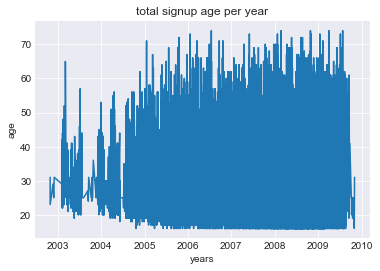

In [28]:
# overall signup ages per year
sns.set_style("darkgrid")
plt.xlabel('years')
plt.ylabel('age')
plt.plot(usa_signup_age)
plt.title('total signup age per year')
plt.show()

In [29]:
gender_signup_age = usa_profiles.iloc[:, [1,2]]

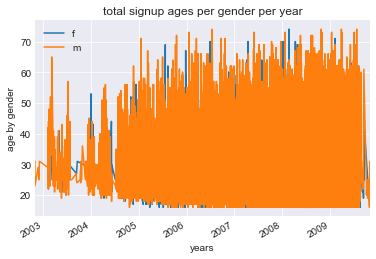

In [30]:
# male vs female signup age per year
gender_signup_age.groupby('gender')['age'].plot(legend=True)
plt.xlabel('years')
plt.ylabel('age by gender')
plt.title('total signup ages per gender per year')
plt.show()

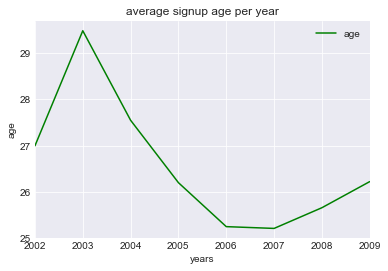

In [31]:
# average a signup age per year
usa_signup_age.groupby(pd.TimeGrouper('A')).mean().plot(legend=True, color='green')
plt.xlabel('years')
plt.ylabel('age')
plt.title('average signup age per year')
plt.show()

In [32]:
avg_annual_signup = usa_signup_age.groupby(pd.TimeGrouper('A')).mean()

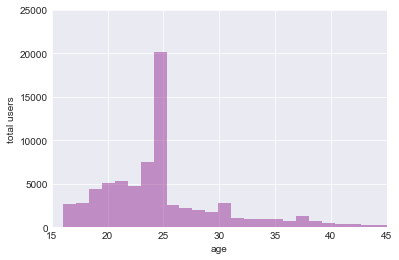

In [33]:
sns.distplot(usa_signup_age, hist=True, color='purple', kde=False)
plt.xlabel('age')
plt.ylabel('total users')
plt.ylim(0, 25000)
plt.xlim(15, 45)
plt.title('')
plt.show()

In [34]:
full_df.head()

,users,artist,plays,gender,age,country
0,00001411dc427966b17297bf4d69e7e193135d89,the most serene republic,12763,f,25.0,Canada
1,00001411dc427966b17297bf4d69e7e193135d89,stars,8192,f,25.0,Canada
2,00001411dc427966b17297bf4d69e7e193135d89,broken social scene,6413,f,25.0,Canada
3,00001411dc427966b17297bf4d69e7e193135d89,have heart,5361,f,25.0,Canada
4,00001411dc427966b17297bf4d69e7e193135d89,luminous orange,5120,f,25.0,Canada


In [35]:
user_plays = full_df[['age', 'plays']]

In [36]:
user_plays.head()

,age,plays
0,25.0,12763
1,25.0,8192
2,25.0,6413
3,25.0,5361
4,25.0,5120


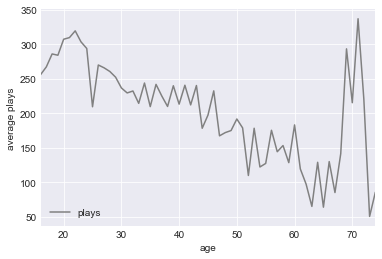

In [37]:
# average plays per age
user_plays.groupby('age').mean().plot(color='grey')
plt.xlabel('age')
plt.ylabel('average plays')
plt.show()

In [38]:
# highest average plays per age
avg_plays_per_age = user_plays.groupby('age').mean()

In [ ]:
# early conclusion 1: little to no gender influence on registration patterns; proportionally similar rates of signup between males and females
# early conclusion 2: year to year, average age range continues to float between 25 and 30 years old
# early conclusion 3: highest average play rates are within the early 20s and late 60s/early 70s 